# **Proyecto: Análisis de Datos de Accidentes en una Empresa de Fabricación de Explosivos de Minas**

**Descripción del Proyecto:**

El objetivo principal de este proyecto es realizar un análisis de datos de los accidentes ocurridos en una empresa dedicada a la fabricación de explosivos de minas. El análisis tiene como objetivo proporcionar una comprensión profunda de los accidentes ocurridos en la empresa, identificar patrones y tendencias, y ofrecer información que pueda utilizarse para mejorar la seguridad y reducir los accidentes en el futuro.


**Preguntas a Responder:**
1. Los accidentes aumetaron con cada año?
2. Cuál es el tipo de accidente que se detecto con mayor frecuencia?
3. Cuántos accidentes causaron lesiones al personal?
4. Cuál es la causa principal de estos accidentes?
5. Que relación existe entre las causa y los tipos de incidentes?

Con estas preguntas comenzaremos a hacer nuestro análisis buscando extraer la mayor cantidad de información que se pueda obtener del conjunto.

In [1]:
import pandas as pd

In [2]:
#Load the data set
data = pd.read_csv(
        r'C:\Users\HP\Desktop\Kahuna\data_Incidentes.txt', 
        encoding='latin-1' , 
        sep='\t',
        index_col = 'Incidente_ID')
data.head()

,SolicitudId,Incidente,FechaCierre,EstadoId,EstadoId_D,FechaCreacion,FechaActualizacion,NumeroCompleto,UbicacionN1,UbicacionN2,...,iCategorizacionInt,IncidenteconLesion,TipoPersonalLeionado,iIncidenteconLesion,TipoLesion,iRequiereInvestigacion,RequiereInvestigacion,LiderInvestigacion,TipoInvestigacion,Causa
Incidente_ID,,,,,,,,,,,,,,,,,,,,,
1,14347,1,1/06/2030,6,Cerrado,3/06/2020,27/06/2020,RI000001,Cerro Vanguardia,OPERACION UG,...,Otros,NO,Personal no Lesionado,0,Sin Lesión,False,NO,Sin Investigador,Sin Investigación,Sin Causa
2,14350,1,1/06/2030,6,Cerrado,3/06/2020,26/10/2020,RI000002,Cerro Vanguardia,OPERACION UG,...,Otros,NO,Personal no Lesionado,0,Sin Lesión,True,SI,Nadia Engler,Investigacion Detallada,Sin Causa detectada
3,14353,1,1/06/2030,6,Cerrado,3/06/2020,13/11/2020,RI000003,Tandil/Olavarria,Operación Cantera,...,Seguridad e Higiene,NO,Personal no Lesionado,0,Sin Lesión,True,SI,Nadia Engler,Investigacion Detallada,Sin Causa detectada
4,14358,1,1/06/2030,6,Cerrado,3/06/2020,29/10/2020,RI000004,Chinchillas,OPERACIÓN OP,...,Seguridad e Higiene,NO,Personal no Lesionado,0,Sin Lesión,True,SI,Pablo Gali,Investigacion Detallada,CL01-Planificación de trabajo inadecuada BB06-...
5,14360,1,1/06/2030,6,Cerrado,3/06/2020,6/04/2021,RI000005,Cerro Vanguardia,OPERACION OP,...,Seguridad e Higiene,NO,Personal no Lesionado,0,Sin Lesión,True,SI,Nadia Engler,Investigacion Detallada,Sin Causa detectada


In [3]:
#let's see what the data looks like
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1443 entries, 1 to 1443
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   SolicitudId             1443 non-null   int64 
 1   Incidente               1443 non-null   int64 
 2   FechaCierre             1443 non-null   object
 3   EstadoId                1443 non-null   int64 
 4   EstadoId_D              1443 non-null   object
 5   FechaCreacion           1443 non-null   object
 6   FechaActualizacion      1443 non-null   object
 7   NumeroCompleto          1443 non-null   object
 8   UbicacionN1             1427 non-null   object
 9   UbicacionN2             1427 non-null   object
 10  iTituloIncidente        1443 non-null   object
 11  SectorInformaN1         1443 non-null   object
 12  SectorInformaN2         1443 non-null   object
 13  iFechaIncidente         1443 non-null   object
 14  iYear                   1443 non-null   int64 
 15  iMonth   

In [4]:
#Let's look at the NaN or null values ​​in the data and evaluate whether they affect the analysis of the data
data.isna().sum()

SolicitudId                0
Incidente                  0
FechaCierre                0
EstadoId                   0
EstadoId_D                 0
FechaCreacion              0
FechaActualizacion         0
NumeroCompleto             0
UbicacionN1               16
UbicacionN2               16
iTituloIncidente           0
SectorInformaN1            0
SectorInformaN2            0
iFechaIncidente            0
iYear                      0
iMonth                     0
iConsecuencia              0
TipoIncidenteN1            0
TipoIncidenteN2            0
iCategorizacionInt         0
IncidenteconLesion         0
TipoPersonalLeionado       0
iIncidenteconLesion        0
TipoLesion                 0
iRequiereInvestigacion     6
RequiereInvestigacion      0
LiderInvestigacion         0
TipoInvestigacion          0
Causa                     13
dtype: int64

In [5]:
#Deleted any row with 0 values ​​from the LocationN1 column
data=data[data['UbicacionN1'].notna()]

In [6]:
#Complete empty rows in the Cause column with 'No Cause Detected'
data['Causa'].fillna('Sin Causa detectada', inplace=True)

In [7]:
#We removed the 2019 and 2023 data from the iYear column.
values_to_delete = [2019, 2023]
data = data[~data['iYear'].isin(values_to_delete)]

In [8]:
data.isna().sum()

SolicitudId               0
Incidente                 0
FechaCierre               0
EstadoId                  0
EstadoId_D                0
FechaCreacion             0
FechaActualizacion        0
NumeroCompleto            0
UbicacionN1               0
UbicacionN2               0
iTituloIncidente          0
SectorInformaN1           0
SectorInformaN2           0
iFechaIncidente           0
iYear                     0
iMonth                    0
iConsecuencia             0
TipoIncidenteN1           0
TipoIncidenteN2           0
iCategorizacionInt        0
IncidenteconLesion        0
TipoPersonalLeionado      0
iIncidenteconLesion       0
TipoLesion                0
iRequiereInvestigacion    3
RequiereInvestigacion     0
LiderInvestigacion        0
TipoInvestigacion         0
Causa                     0
dtype: int64

In [9]:
#let's see what the data looks like after the changes
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1378 entries, 1 to 1421
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   SolicitudId             1378 non-null   int64 
 1   Incidente               1378 non-null   int64 
 2   FechaCierre             1378 non-null   object
 3   EstadoId                1378 non-null   int64 
 4   EstadoId_D              1378 non-null   object
 5   FechaCreacion           1378 non-null   object
 6   FechaActualizacion      1378 non-null   object
 7   NumeroCompleto          1378 non-null   object
 8   UbicacionN1             1378 non-null   object
 9   UbicacionN2             1378 non-null   object
 10  iTituloIncidente        1378 non-null   object
 11  SectorInformaN1         1378 non-null   object
 12  SectorInformaN2         1378 non-null   object
 13  iFechaIncidente         1378 non-null   object
 14  iYear                   1378 non-null   int64 
 15  iMonth   

In [10]:
#Overview of the numerical variables of the set
data.describe()

,SolicitudId,Incidente,EstadoId,iYear,iMonth
count,1378.000000,1378.0,1378.000000,1378.000000,1378.000000
mean,25424.558781,1.0,5.934688,2021.053701,6.496372
std,8581.356508,0.0,0.432958,0.868235,3.463733
min,14347.000000,1.0,3.000000,2020.000000,1.000000
25%,17217.000000,1.0,6.000000,2020.000000,3.000000
50%,24166.500000,1.0,6.000000,2021.000000,7.000000
75%,33287.500000,1.0,6.000000,2022.000000,9.000000
max,40335.000000,1.0,6.000000,2022.000000,12.000000


## **Analysis of Incidents per year**
We begin with the analysis of the whole, we answer the first question if incidents increased with each year

In [11]:
#What is the total number of incidents?
Sum_Incidents=data['Incidente'].sum()
print ('Total Incidents: \n',Sum_Incidents)

Total Incidents: 
 1378


In [12]:
#fill all missing values ​​(NaN) in a data set called "data" with the value 0
data_eda=data.fillna(0)

In [13]:
#Let's separate the year and month, specify the date format
import datetime as dt
data_eda['iFechaIncidente']=pd.to_datetime(data_eda['iFechaIncidente'], format='%d/%m/%Y')

data_eda['Month']=data_eda['iFechaIncidente'].dt.month
data_eda['Year']=data_eda['iFechaIncidente'].dt.year

In [14]:
#We determine the total number of incidents per year
by_month=data_eda.groupby(data_eda['iFechaIncidente'].dt.year).count().iFechaIncidente
by_month

iFechaIncidente
2020    484
2021    336
2022    558
Name: iFechaIncidente, dtype: int64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

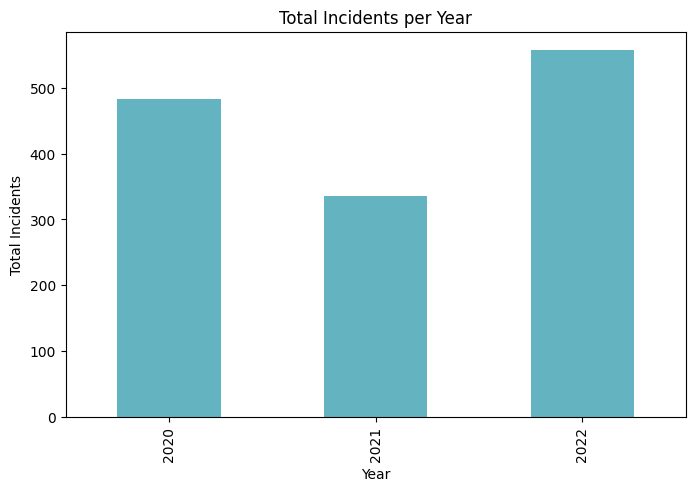

In [16]:
# Create the bar chart
by_month.plot(kind='bar', color='#63b3c0', figsize=(8, 5))

# Add a title to the chart
plt.title('Total Incidents per Year')

# x-axis label
plt.xlabel('Year')

# y-axis label
plt.ylabel('Total Incidents')

# Show the graph
plt.show()

In [17]:
#we create the table of total incidents per year
by_month=data_eda.groupby(data_eda['iFechaIncidente'].dt.year).count().iFechaIncidente
by_month = by_month.reset_index(name='TotalIncidentes')

# Rename the columns
by_month = by_month.rename(columns={'iFechaIncidente': 'Year'})
by_month = by_month.rename(columns={'TotalIncidentes': 'Total Incident'})

by_month

,Year,Total Incident
0,2020,484
1,2021,336
2,2022,558


In [18]:
#What is the month with the highest incidents detected?
Total_per_month=data_eda.groupby(['Year','Month'])['Incidente'].sum()
Total_per_month

Year  Month
2020  1        54
      2        58
      3        35
      4         5
      5        30
      6        39
      7        61
      8        40
      9        58
      10       40
      11       28
      12       36
2021  1        21
      2        24
      3        33
      4        26
      5        25
      6        29
      7        27
      8        41
      9        31
      10       45
      11       17
      12       17
2022  1        52
      2        52
      3        27
      4        62
      5        43
      6        34
      7        52
      8        52
      9        42
      10       35
      11       40
      12       67
Name: Incidente, dtype: int64

Text(0.5, 1.0, 'Total Incidents per Year-Month')

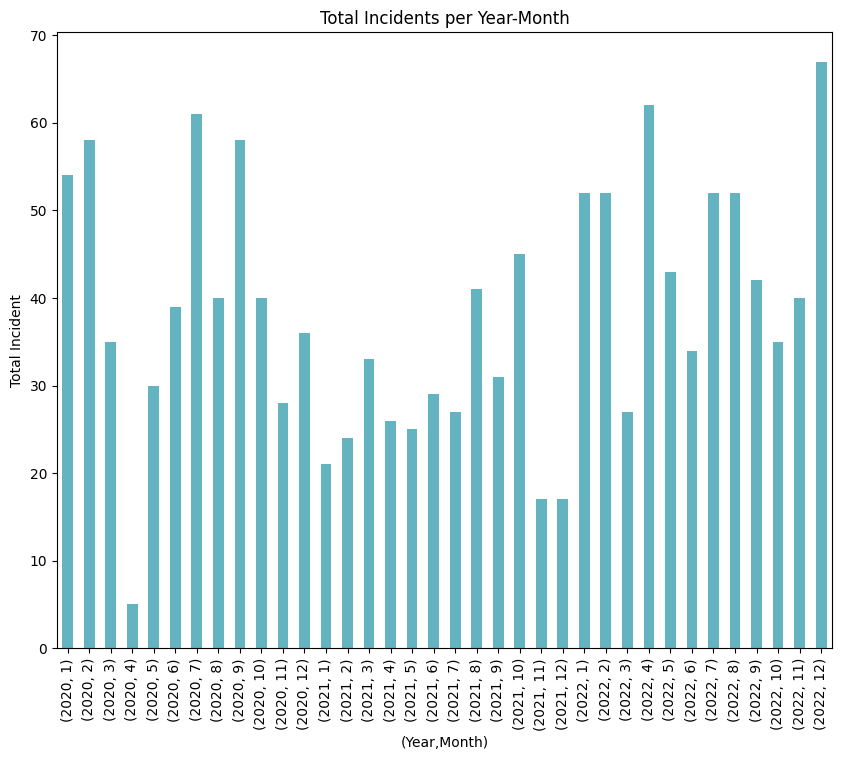

In [19]:
#Create a bar chart from the data contained in "Total_per_month."
Total_per_month.plot(kind='bar', color='#63b3c0',figsize=(10,8))

# Customize the chart
plt.xlabel('(Year,Month)')
plt.ylabel('Total Incident')
plt.title('Total Incidents per Year-Month')

In [20]:
# Sort the months in descending order
Total_per_month_sorted = Total_per_month.sort_values(ascending=False)

# Take the first 5 months with the highest number of incidents
top_5_months = Total_per_month_sorted.head(5)
top_5_months = top_5_months.reset_index()

# Rename the columns
top_5_months = top_5_months.rename(columns={'Incidente': 'Incident'})

# Print the results
print(top_5_months)

   Year  Month  Incident
0  2022     12        67
1  2022      4        62
2  2020      7        61
3  2020      2        58
4  2020      9        58


In [21]:
# Sort the months in descending order
Total_per_month_sorted = Total_per_month.sort_values(ascending=True)

# Take the first 5 months with the highest number of incidents
top_5_months = Total_per_month_sorted.head(5)
top_5_months = top_5_months.reset_index()

# Rename the columns
top_5_months = top_5_months.rename(columns={'Incidente': 'Incident'})

# Print the results
print(top_5_months)

   Year  Month  Incident
0  2020      4         5
1  2021     12        17
2  2021     11        17
3  2021      1        21
4  2021      2        24


In [22]:
import numpy as np
import pandas as pd

# Average (arithmetic mean)
Average = Total_per_month.mean()

# Median
Median = Total_per_month.median()

# Standard deviation
Standard_deviation = Total_per_month.std()

# Other statistical metrics
minimum = Total_per_month.min()
maximum = Total_per_month.max()
range = maximum - minimum  # Range: the difference between the maximum and minimum
addition = Total_per_month.sum()

# Imprimir los resultados
print(f'Average: {Average}')
print(f'Median: {Median}')
print(f'Standard deviation: {Standard_deviation}')
print(f'Minimum: {minimum}')
print(f'Maximum: {maximum}')
print(f'Range: {range}')
print(f'Addition: {addition}')


Average: 38.27777777777778
Median: 37.5
Standard deviation: 14.405576521633382
Minimum: 5
Maximum: 67
Range: 62
Addition: 1378


## **Analysis of incident types**

In [23]:
# Group by 'IncidentType' and count the incidents in each group
Top_IncidentType = data.groupby('TipoIncidenteN1')['Incidente'].count()

# Convert the resulting series into a DataFrame
Top_IncidentType = Top_IncidentType.reset_index()

# Rename columns
Top_IncidentType = Top_IncidentType.rename(columns={'TipoIncidenteN1': 'Incident Type'})
Top_IncidentType = Top_IncidentType.rename(columns={'Incidente': 'Total'})

#Let's see the top 5 by type of incidents, let's exclude
Top_IncidentType = Top_IncidentType.sort_values(by='Total',ascending=False)
Top_IncidentType.head(5)

,Incident Type,Total
1,Condicion Insegura,1026
5,Near Miss de alto Potencial,133
7,Sugerencia/Otros,91
0,Acto Inseguro,84
6,Primeros Auxilios,18


In [24]:
# Group by 'IncidentType' and count the incidents in each group
Top_incident_subtype = data.groupby('TipoIncidenteN2')['Incidente'].count()

# Convert the resulting series to a DataFrame
Top_incident_subtype = Top_incident_subtype.reset_index()

# Rename the columns
Top_incident_subtype = Top_incident_subtype.rename(columns={'TipoIncidenteN2': 'Incident SubType'})
Top_incident_subtype = Top_incident_subtype.rename(columns={'Incidente': 'Total'})

#Let's see the top 10 by Sub type of incidents, let's exclude
Top_incident_subtype = Top_incident_subtype.sort_values(by='Total',ascending=False)
Top_incident_subtype.head(10)

,Incident SubType,Total
25,TI-Condicion Insegura,1026
28,TI-Sugerencia/Otros,90
18,HM-Tiro quedado,35
22,TI - MVI - Incidente menor con vehículos,33
27,TI-Otros,25
23,TI - OD - Distraccion del Operario,22
5,HM-Falla de Procedimiento (Operativo),19
6,HM-Falla de maquinaria,19
1,FAI - Primeros Auxilios,18
8,HM-Incidente Ambiental C,14


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

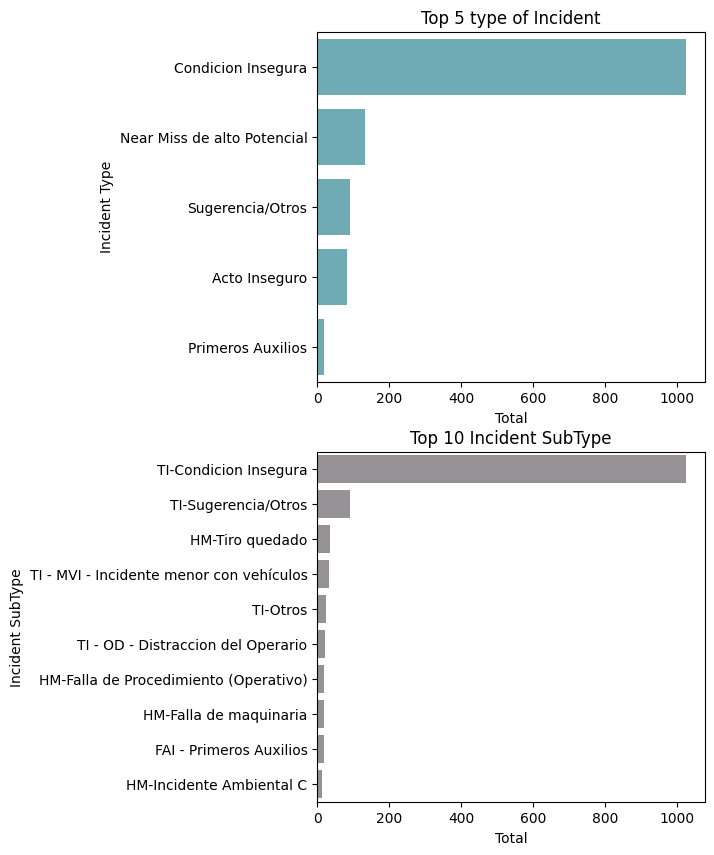

In [26]:
# Create a figure with two vertically stacked subplots
f, axes = plt.subplots(2, 1, figsize=(5, 10))

ax2 = sns.barplot(x='Total', y='Incident Type', data=Top_IncidentType.head(5), color='#63b3c0', ax=axes[0])
ax2.set(title='Top 5 type of Incident')

ax3 = sns.barplot(x='Total', y='Incident SubType', data=Top_incident_subtype.head(10), color='#979095', ax=axes[1])
ax3.set(title='Top 10 Incident SubType')

plt.show()

## **Analysis of incidents that generated injuries**

In [27]:
#Number of incidents with injury, type of personnel and type of injury caused
data_injury_incident = data['IncidenteconLesion'].value_counts()

# Convert the resulting series to a DataFrame
data_injury_incident=data_injury_incident.reset_index()

# Rename the columns
data_injury_incident = data_injury_incident.rename(columns={'IncidenteconLesion': 'Incident with Injury'})
data_injury_incident = data_injury_incident.rename(columns={'count': 'Total'})

data_injury_incident.head()

,Incident with Injury,Total
0,NO,1334
1,SI,44


In [28]:
#determine the percentage of incidents with injury

data_injury_incident['share (%)']=data_injury_incident['Total']/[data_injury_incident['Total'].sum()]*100
data_injury_incident['share (%)']=data_injury_incident['share (%)'].round(2)
data_injury_incident

,Incident with Injury,Total,share (%)
0,NO,1334,96.81
1,SI,44,3.19


**Determine the incidents that resulted in injuries and the type of injury**

In [29]:
# Filter rows with incidents that have injury
incident_type_injury = data[data['IncidenteconLesion'] == 'SI']

# Select the relevant columns
incident_type_injury = incident_type_injury['TipoLesion'].value_counts()
incident_type_injury = incident_type_injury.reset_index()

# Rename the columns
incident_type_injury = incident_type_injury.rename(columns={'TipoLesion': 'Type Injury'})
incident_type_injury = incident_type_injury.rename(columns={'count': 'Total'})

incident_type_injury

,Type Injury,Total
0,Por esfuerzo o movimiento repetitivo,10
1,Resbalon tropiezo o caida,7
2,Goplpeado contra objeto,5
3,Quemadura quimica o respuesta adversa a la sus...,5
4,Otro,4
5,Laceracion abrasion o puncion / herida,3
6,Esguince o una torcedura,3
7,Sin Lesión,2
8,Quemadura,2
9,Golpeado por objeto,2


In [30]:
incident_type_injury['share (%)']=incident_type_injury['Total']/[incident_type_injury['Total'].sum()]*100
incident_type_injury['share (%)']=incident_type_injury['share (%)'].round(2)
incident_type_injury

,Type Injury,Total,share (%)
0,Por esfuerzo o movimiento repetitivo,10,22.73
1,Resbalon tropiezo o caida,7,15.91
2,Goplpeado contra objeto,5,11.36
3,Quemadura quimica o respuesta adversa a la sus...,5,11.36
4,Otro,4,9.09
5,Laceracion abrasion o puncion / herida,3,6.82
6,Esguince o una torcedura,3,6.82
7,Sin Lesión,2,4.55
8,Quemadura,2,4.55
9,Golpeado por objeto,2,4.55


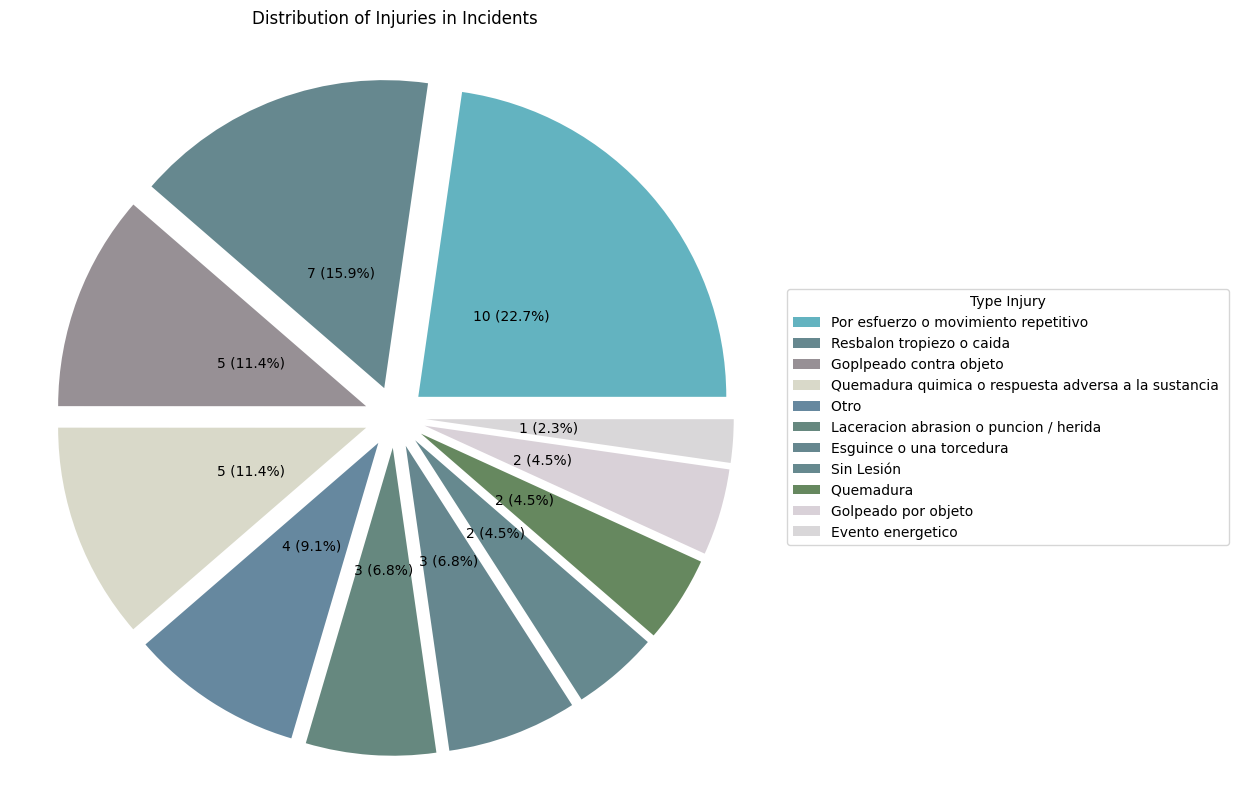

In [31]:
#We can represent all these shares in a pie chart
colors=['#63b3c0','#66888f','#979095','#d9d9c9','#66889f','#66887f','#66878f','#66898f','#66885f','#d9d1d8','#d9d7d9']
sns.set_palette(sns.color_palette(colors))

# Set the value of 'explode' to separate the parts of the cake
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

# Increase the distance of the labels from the center of the cake
labeldistance = 1.1

# Create a pie chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax.pie(incident_type_injury['share (%)'], labels=None, explode=explode, labeldistance=labeldistance, 
                                  colors=colors, autopct='%1.1f%%')

# Add the data labels outside the pie with percentage and quantity
for w, t, at, label in zip(wedges, texts, autotexts, incident_type_injury['Total']):
    ang = (w.theta2 - w.theta1) / 2. + w.theta1
    x = 0.5 * np.cos(np.deg2rad(ang))
    y = 0.5 * np.sin(np.deg2rad(ang))
    t.set_position((x, y))
    t.set_horizontalalignment('center')
    at.set_position((x, y))  # Adjust the vertical position
    at.set_horizontalalignment('center')
    at.set_text(f"{label} ({at.get_text()})")  # Add the quantity in parentheses

# Add data labels
labels = incident_type_injury['Type Injury']
ax.legend(wedges, labels, title='Type Injury', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title('Distribution of Injuries in Incidents')

# Show the graph
plt.show()


**I determine the incidents that generated injuries and the type of injured personnel**

In [32]:
# Filter rows with incidents that have injury
personnel_with_injury = data[data['IncidenteconLesion'] == 'SI']

# Remove whitespace at the beginning or end of 'InjuredPersonnelType'
personnel_with_injury.loc[:, 'TipoPersonalLeionado'] = personnel_with_injury['TipoPersonalLeionado'].str.strip()

# Group by 'InjuredPersonalType' and count the values
personnel_with_injury = personnel_with_injury.groupby('TipoPersonalLeionado').size().reset_index(name='count')

# Rename the columns
personnel_with_injury = personnel_with_injury.rename(columns={'TipoPersonalLeionado': 'Injured staff'})
personnel_with_injury = personnel_with_injury.rename(columns={'count': 'Total'})

# Muestra el DataFrame resultante
personnel_with_injury

,Injured staff,Total
0,Contratista,6
1,Empleado,38


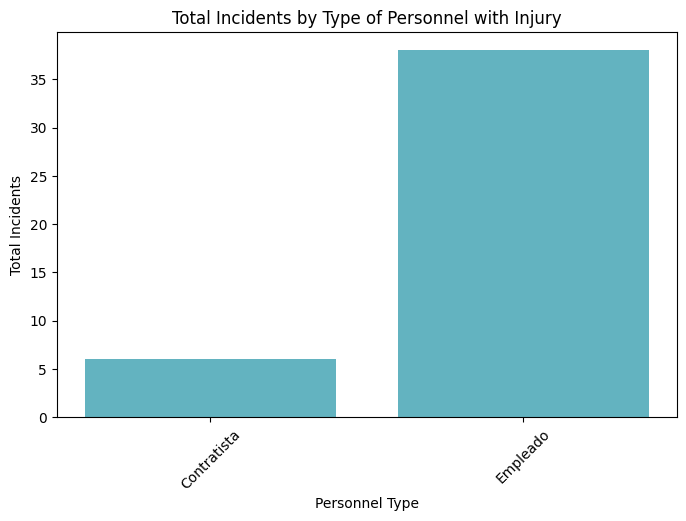

In [33]:
# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(personnel_with_injury['Injured staff'], personnel_with_injury['Total'], color='#63b3c0')

# Customize the chart
plt.xlabel('Personnel Type')
plt.ylabel('Total Incidents')
plt.title('Total Incidents by Type of Personnel with Injury')
plt.xticks(rotation=45)  # Rotate X axis labels for better readability

plt.show()

**We detect the main causes of incidents**

In [34]:
# Use rsplit to split the 'Cause' column at the last dash "-", and remove whitespace
data['Causa'] = data['Causa'].str.rsplit('-', n=1).str[-1].str.strip()

# Filters the rows where 'RequiresInvestigation' is equal to 'SI' and some values ​​are not taken in the 'Cause' column
incidents_cause = data[(data['RequiereInvestigacion'] == 'SI') & (data['Causa'] != 'No aplica.') & (data['Causa'] != 'Sin Causa detectada')]

# Group and count incidents by part of the cause
incidents_cause = incidents_cause.groupby('Causa')['Incidente'].count().reset_index()

# Rename the columns
incidents_cause = incidents_cause.rename(columns={'Causa': 'Cause'})
incidents_cause = incidents_cause.rename(columns={'Incidente': 'Total Incident'})

#Let's see the top 2 by Cause of incidents
incidents_cause = incidents_cause.sort_values(by='Total Incident',ascending=False)
incidents_cause.head()

,Cause,Total Incident
1,Factores del Trabajo,73
0,Factores Personales,51


In [35]:
# Apply the filter for 'RequiresInvestigation' == 'YES'
data_filtered = data[(data['RequiereInvestigacion'] == 'SI') & (data['Causa'] != 'No aplica.') & (data['Causa'] != 'Sin Causa detectada')]

# Calculate the cross frequency table
frequency_table = pd.crosstab(data_filtered['Causa'], data_filtered['TipoIncidenteN1'])

# Shows the cross frequency table
frequency_table.head()

TipoIncidenteN1,Acto Inseguro,Condicion Insegura,Enfermedad Profesional,Incidente con dias perdidos,Near Miss de alto Potencial,Primeros Auxilios,Sugerencia/Otros,Tratamiento Medico
Causa,,,,,,,,
Factores Personales,17,3,1,2,20,2,2,4
Factores del Trabajo,9,8,1,5,43,6,0,1


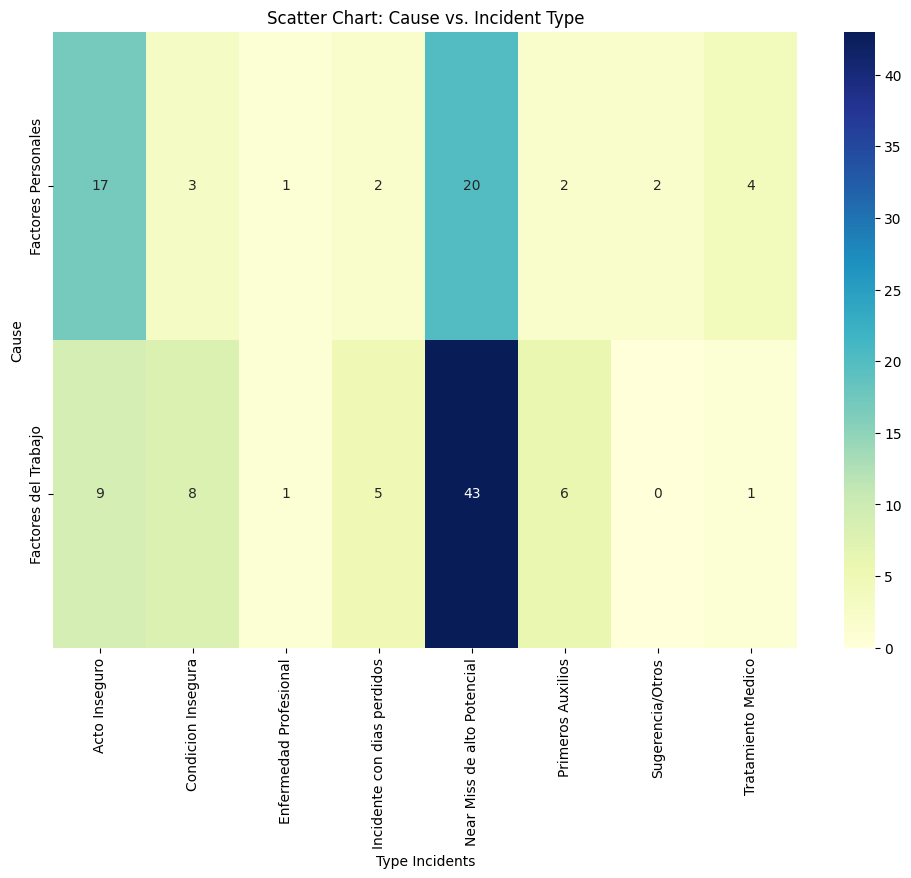

In [36]:
# Show scatter plot
plt.figure(figsize=(12, 8))
sns.heatmap(frequency_table, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Scatter Chart: Cause vs. Incident Type')
plt.xlabel('Type Incidents')
plt.ylabel('Cause')
plt.show()
